***
***
$$
\huge{
    \boxed{\text{Advection Problem}}
    \\
    \frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x}=0
    \\
    \boxed{\text{1. Forward difference for space}}\\
    u^{i+1}_j=u^i_{j+1}-\frac{c\Delta t}{\Delta x}(u^i_{j+1}-u^i_j)
    \\
    \boxed{\text{2. Backward difference for space}}\\
    u^{i+1}_j=u^i_j-\frac{c\Delta t}{\Delta x}(u^i_j-u^i_{j-1})
    \\
    \boxed{\text{3. Center difference for space}}\\
    u^{i+1}_j=u^i_j-\frac{c\Delta t}{2\Delta x}(u^i_{j+1}-u^i_{j-1})
}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_shape(x, u):
    tn = 5
    nt = len(u[:, 0])
    nn = nt // tn
    plt.figure(figsize=(15, 5))
    for i in range(tn+1):
        d = u[i*nn]
        if i < tn:
            plt.plot(x, d, ls=':', lw=5)
        else:
            plt.plot(x, d, lw=5)
    plt.show()

def adv_1D_forward(nt, dt, nx, dx, c, sx, sigma):
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    u = np.zeros((nt, nx))
    u[0] = np.exp(-(x-sx*dx)**2/sigma**2)
    for i in range(nt-1):
        for j in range(0, nx-1):
            u[i+1, j+1] = u[i, j+1] - c*dt*(u[i, j+1]-u[i, j])/dx
    plot_shape(x, u)
    
def adv_1D_backward(nt, dt, nx, dx, c, sx, sigma):
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    u = np.zeros((nt, nx))
    u[0] = np.exp(-(x-sx*dx)**2/sigma**2)
    for i in range(nt-1):
        for j in range(1, nx):
            u[i+1, j] = u[i, j] - c*dt*(u[i, j]-u[i, j-1])/dx
    plot_shape(x, u)

def adv_1D_center(nt, dt, nx, dx, c, sx, sigma):
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    u = np.zeros((nt, nx))
    u[0] = np.exp(-(x-sx*dx)**2/sigma**2)
    for i in range(nt-1):
        for j in range(1, nx-1):
            u[i+1, j] = u[i, j] - c*dt*(u[i, j+1]-u[i, j-1])/(2*dx)
    plot_shape(x, u)
    
def adv_1D(nt, dt, nx, dx, c, sx, sigma):
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    u = np.zeros((nt, nx))
    u[0] = np.exp(-(x-sx*dx)**2/sigma**2)
    for i in range(1, nt-1):
        for j in range(1, nx-1):
            u[i+1, j] = u[i-1, j] - c*2*dt*(u[i, j+1]-u[i, j-1])/(2*dx)
    plot_shape(x, u)

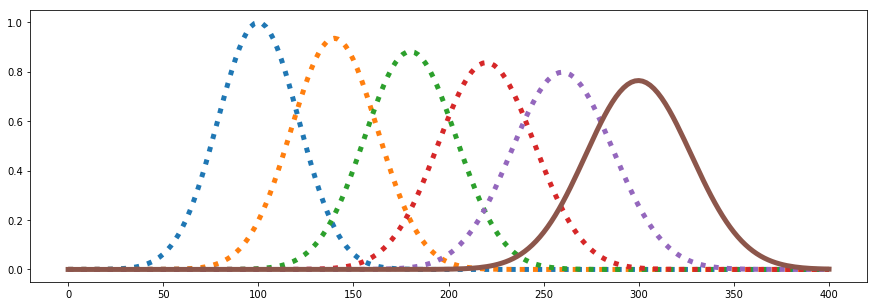

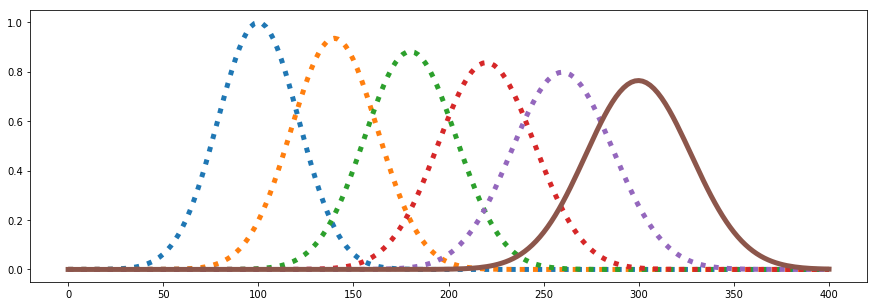

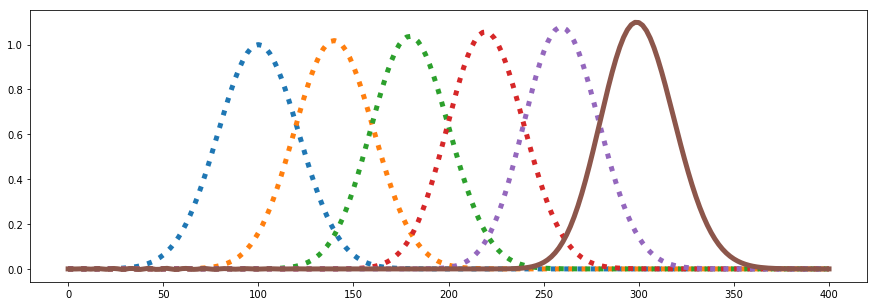

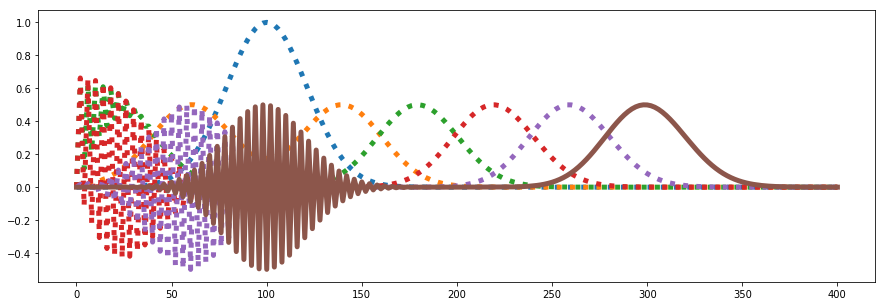

In [2]:
nt = 501
dt = 1e-3
nx = 201
dx = 2
sigma = 30
c = 400
sx = nx // 4

adv_1D_forward(nt, dt, nx, dx, c, sx, sigma)
adv_1D_backward(nt, dt, nx, dx, c, sx, sigma)
adv_1D_center(nt, dt, nx, dx, c, sx, sigma)
adv_1D(nt, dt, nx, dx, c, sx, sigma)

$$
\huge{
    \boxed{\text{Diffusion Problem}}
    \\
    \frac{\partial u}{\partial t} - D\frac{\partial ^2 u}{\partial x^2}=0
    \\
    \boxed{\text{1. Forward difference for time.}}\\
    u^{i+1}_j=u^i_j+\frac{D\Delta t}{\Delta x^2}(u^i_{j+1}-2u^i_j+u^i_{j-1})
    \\
    \boxed{\text{2. Backward difference for time.}}\\
    u^{i}_j=u^{i-1}_j+\frac{D\Delta t}{\Delta x^2}(u^{i-1}_{j+1}-2u^{i-1}_j+u^{i-1}_{j-1})
    \\
    \boxed{\text{3. Center difference for time.}}\\
    u^{i+1}_j=u^{i-1}_j+\frac{2D\Delta t}{\Delta x^2}(u^i_{j+1}-2u^i_j+u^i_{j-1})
}
$$

In [35]:
import numpy as np
import matplotlib.pyplot as plt


def plot_2D_shape(x, y, u):
    tn = 9
    nt = len(u[:, 0])
    nn = nt // tn
    plt.figure(figsize=(30, 10))
    for i in range(tn+1):
        d = u[i*nn]
        plt.subplot(2, 5, i+1)
        plt.pcolormesh(x, y, d, cmap='Spectral_r', shading='gouraud')
        plt.colorbar(shrink=0.8)
    plt.show()

def diff_1D_forward(nt, dt, nx, dx, D, u1, u2, um):
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    u = np.zeros((nt, nx))
    u[:, 0] = u1
    u[:, nx-1] = u2
    u[:, 1: nx-1] = um
    for i in range(0, nt-1):
        for j in range(1, nx-1):
            u[i+1, j] = u[i, j] + D*dt*(u[i, j+1]-2*u[i, j]+u[i, j-1])/dx**2
    plot_shape(x, u)
    
def diff_1D_backward(nt, dt, nx, dx, D, u1, u2, um):
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    u = np.zeros((nt, nx))
    u[:, 0] = u1
    u[:, nx-1] = u2
    u[:, 1: nx-1] = um
    for i in range(1, nt):
        for j in range(1, nx-1):
            u[i, j] = u[i-1, j] + D*dt*(u[i-1, j+1]-2*u[i-1, j]+u[i-1, j-1])/dx**2
    plot_shape(x, u)

def diff_1D_center(nt, dt, nx, dx, D, u1, u2, um):
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    u = np.zeros((nt, nx))
    u[:, 0] = u1
    u[:, nx-1] = u2
    u[:, 1: nx-1] = um
    for i in range(1, nt-1):
        for j in range(1, nx-1):
            u[i+1, j] = u[i-1, j] + D*2*dt*(u[i, j+1]-2*u[i, j]+u[i, j-1])/dx**2
    plot_shape(x, u)
    
def diff_2D_forward(nt, dt, nx, ny, dx, dy, D, ub, um):
    x = np.arange(nx) * dx
    y = np.arange(ny) * dy
    t = np.arange(nt) * dt
    u = np.zeros((nt, nx, nx))
    u[:, 0, ny*12//25: ny*14//25] = ub
    u[:, 1: nx-1, 1: nx-1] = um
    for i in range(0, nt-1):
        for j in range(1, nx-1):
            for k in range(1, nx-1):
                u[i+1, j, k] = u[i, j, k] + D[j, k]*dt/dx**2*(+u[i, j, k+1]+u[i, j, k-1]-2*u[i, j, k]) +\
                D[j, k]*dt/dy**2*(u[i, j+1, k]+u[i, j-1, k]-2*u[i, j, k])
    plot_2D_shape(x, y, u)
    

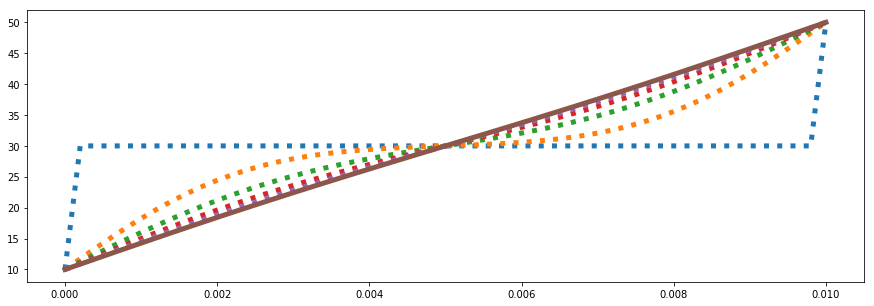

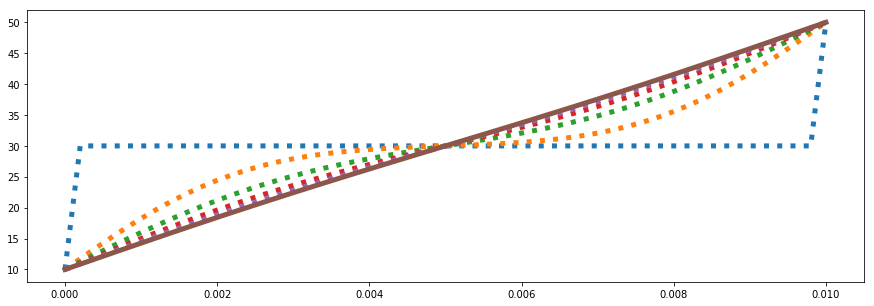

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in double_scalars
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars


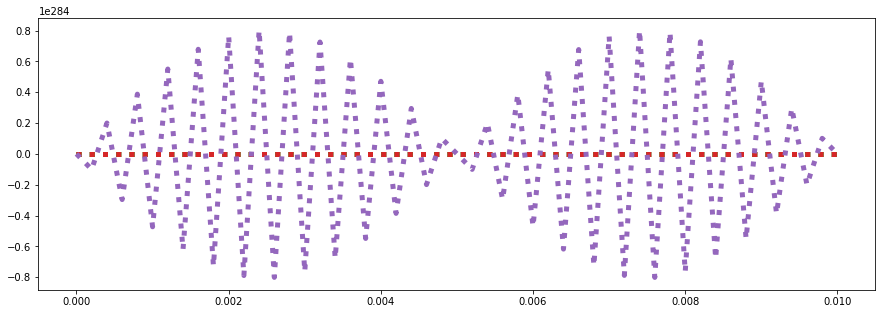

In [4]:
nt = 2001
dt = 1e-3
nx = 51
dx = 0.01 / (nx-1)
D = 4.25e-6
u1 = 10
u2 = 50
um = 30

diff_1D_forward(nt, dt, nx, dx, D, u1, u2, um)
diff_1D_backward(nt, dt, nx, dx, D, u1, u2, um)
diff_1D_center(nt, dt, nx, dx, D, u1, u2, um)

$$
\huge{
    \boxed{\text{Forward difference for time.}}\\
        u^{i+1}_{j,k}=u^i_{j,k}+\frac{D\Delta t}{\Delta x^2}(u^i_{j,k+1}-2u^i_{j,k}+u^i_{j,k-1})+\frac{D\Delta t}{\Delta y^2}(u^i_{j+1,k}-2u^i_{j,k}+u^i_{j-1,k})
}
$$

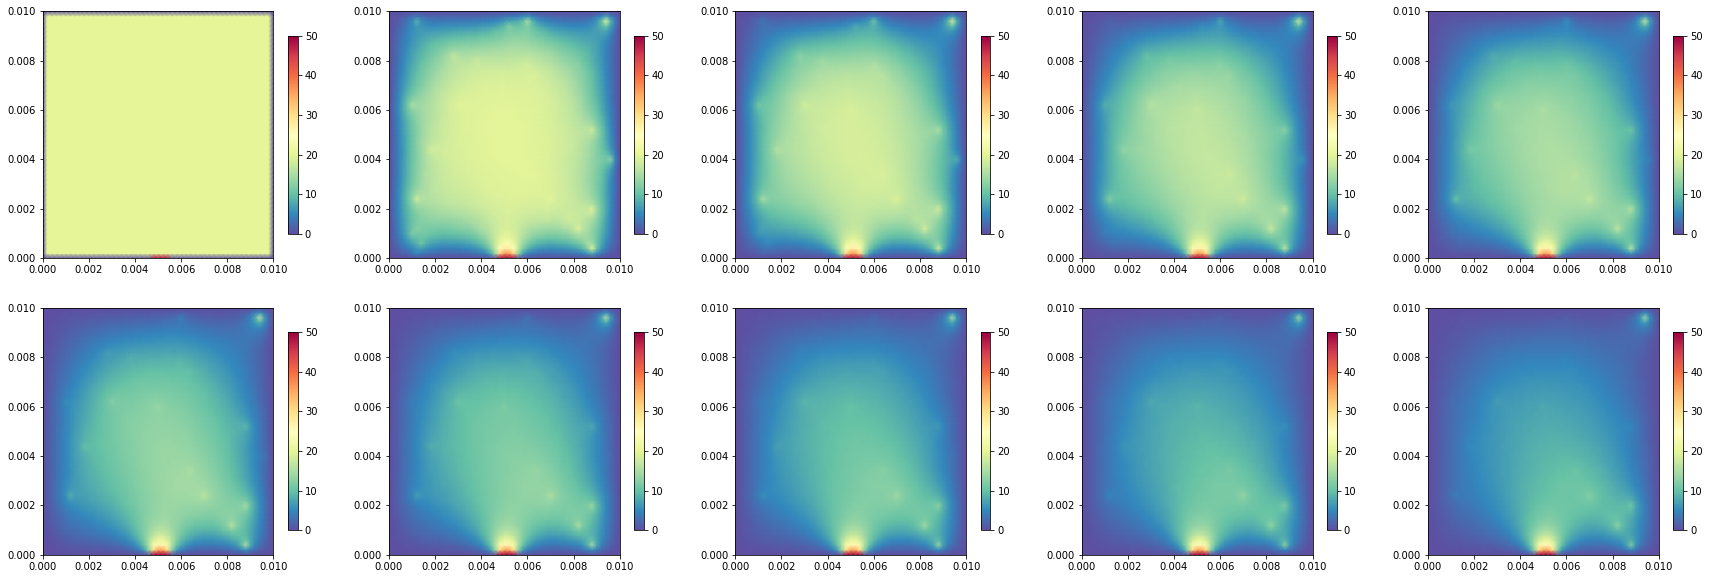

In [38]:
nt = 5001
dt = 2e-3
nx = 51
ny = nx
dx = 0.01 / (nx-1)
dy = dx
D = np.random.random((ny, nx)) * 5e-6
ub = 50
um = 20

diff_2D_forward(nt, dt, nx, ny, dx, dy, D, ub, um)

$$
\Large{
    \boxed{\text{Acoustic Wave Problem}}
    \\
    \frac{\partial ^2 u}{\partial t^2} = c^2\frac{\partial ^2 u}{\partial x^2}
    \\
    \boxed{\text{1. 3-node difference for space}}\\
        u^{i+1}_j=2u^i_j-u^{i-1}_j+\frac{c^2\Delta t^2}{\Delta x^2}(u^i_{j+1}-2u^i_j]+u^i_{j-1})
     \\
     \boxed{\text{2. 5-node difference for space}}\\
        u^{i+1}_j=2u^i_j-u^{i-1}_j+\frac{c^2\Delta t^2}{\Delta x^2}[-\frac{1}{12}(u^i_{j-2}+u^i_{j+2})+\frac{4}{3}(u^i_{j-1}+u^i_{j+1})-\frac{5}{2}u^i_j]
     \\
     \boxed{\text{3. 7-node difference for space}}\\
         u^{i+1}_j=2u^i_j-u^{i-1}_j+\frac{c^2\Delta t^2}{\Delta x^2}[\frac{1}{90}(u^i_{j-3}+u^i_{j+3})-\frac{3}{20}(u^i_{j-2}+u^i_{j+2})+\frac{3}{2}(u^i_{j-1}+u^i_{j+1})-\frac{49}{18}u^i_j]
     \\
     \boxed{\text{4. 9-node difference for space}}\\
         u^{i+1}_j=2u^i_j-u^{i-1}_j+\frac{c^2\Delta t^2}{\Delta x^2}[-\frac{1}{560}(u^i_{j-4}+u^i_{j+4})+\frac{8}{315}(u^i_{j-3}+u^i_{j+3})-\frac{1}{5}(u^i_{j-2}+u^i_{j+2}+\frac{8}{5}(u^i_{j-1}+u^i_{j+1})-\frac{205}{72}u^i_j]
     \\
     \boxed{\text{5. 11-node difference for space}}\\
         u^{i+1}_j=2u^i_j-u^{i-1}_j+\frac{c^2\Delta t^2}{\Delta x^2}[-\frac{1}{3150}(u^i_{j-5}+u^i_{j+5})-\frac{5}{1008}(u^i_{j-4}+u^i_{j+4})+\frac{5}{126}(u^i_{j-3}+u^i_{j+3})-\frac{5}{21}(u^i_{j-2}+u^i_{j+2}+\frac{5}{3}(u^i_{j-1}+u^i_{j+1})-\frac{5269}{1800}u^i_j]
 }
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_1D_shape(x, u, method):
    tn = 5
    nt = len(u[:, 0])
    nn = nt // tn
    plt.figure(figsize=(25, 4))
    for i in range(tn+1):
        d = u[i*nn]
        if i < tn:
            plt.plot(x, d, lw=3)
        else:
            plt.plot(x, d, color='k', lw=4)
    plt.title(method, fontsize=25)
    plt.show()

def aco_1D_3node(nt, dt, f, c, nx, dx, sx, method):
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    u = np.zeros((nt, nx))
    s = (1-2*(np.pi*f*(t-1/f))**2) * np.exp(-(np.pi*f*(t-1/f))**2)
    A = (c*dt/dx)**2
    for i in range(1, nt-1):
        for j in range(1, nx-1):
            if j == sx:
                u[i+1, j] = s[i]
            else:
                u[i+1, j] = 2*u[i, j] - u[i-1, j] + A*(u[i, j+1]-2*u[i, j]+u[i, j-1])
    plot_1D_shape(x, u, method)
    
def aco_1D_5node(nt, dt, f, c, nx, dx, sx, method):
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    u = np.zeros((nt, nx))
    s = (1-2*(np.pi*f*(t-1/f))**2) * np.exp(-(np.pi*f*(t-1/f))**2)
    A = (c*dt/dx)**2
    fd = np.array([-1/12, 4/3, -5/2, 4/3, -1/12])
    m = len(fd)
    n = m // 2
    for i in range(1, nt-1):
        for j in range(n, nx-n):
            if j == sx:
                u[i+1, j] = s[i]
            else:
                tmp = 0.
                for k in range(m):
                    tmp += fd[k]*u[i, j-n+k]
                u[i+1, j] = 2*u[i, j] - u[i-1, j] + A * tmp
    plot_1D_shape(x, u, method)

def aco_1D_7node(nt, dt, f, c, nx, dx, sx, method):
    fd = np.array([1/90, -3/20, 3/2, -49/18, 3/2, -3/20, 1/90])
    m = len(fd)
    n = m // 2
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    u = np.zeros((nt, nx))
    s = (1-2*(np.pi*f*(t-1/f))**2) * np.exp(-(np.pi*f*(t-1/f))**2)
    A = (c*dt/dx)**2
    for i in range(1, nt-1):
        for j in range(n, nx-n):
            if j == sx:
                u[i+1, j] = s[i]
            else:
                tmp = 0.
                for k in range(m):
                    tmp += fd[k]*u[i, j-n+k]
                u[i+1, j] = 2*u[i, j] - u[i-1, j] + A * tmp
    plot_1D_shape(x, u, method)
    
def aco_1D_9node(nt, dt, f, c, nx, dx, sx, method):
    fd = np.array([-1/560, 8/315, -1/5, 8/5, -205/72, 8/5, -1/5, 8/315, -1/560])
    m = len(fd)
    n = m // 2
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    u = np.zeros((nt, nx))
    s = (1-2*(np.pi*f*(t-1/f))**2) * np.exp(-(np.pi*f*(t-1/f))**2)
    A = (c*dt/dx)**2
    for i in range(1, nt-1):
        for j in range(n, nx-n):
            if j == sx:
                u[i+1, j] = s[i]
            else:
                tmp = 0.
                for k in range(m):
                    tmp += fd[k]*u[i, j-n+k]
                u[i+1, j] = 2*u[i, j] - u[i-1, j] + A * tmp
    plot_1D_shape(x, u, method)
    
def aco_1D_11node(nt, dt, f, c, nx, dx, sx, method):
    fd = np.array([-1/3150, -5/1008, 5/126, -5/21, 5/3, -5269/1800, 5/3, -5/21, 5/126, -5/1008, 1/3150])
    m = len(fd)
    n = m // 2
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    u = np.zeros((nt, nx))
    s = (1-2*(np.pi*f*(t-1/f))**2) * np.exp(-(np.pi*f*(t-1/f))**2)
    A = (c*dt/dx)**2
    for i in range(1, nt-1):
        for j in range(n, nx-n):
            if j == sx:
                u[i+1, j] = s[i]
            else:
                tmp = 0.
                for k in range(m):
                    tmp += fd[k]*u[i, j-n+k]
                u[i+1, j] = 2*u[i, j] - u[i-1, j] + A * tmp
    plot_1D_shape(x, u, method)

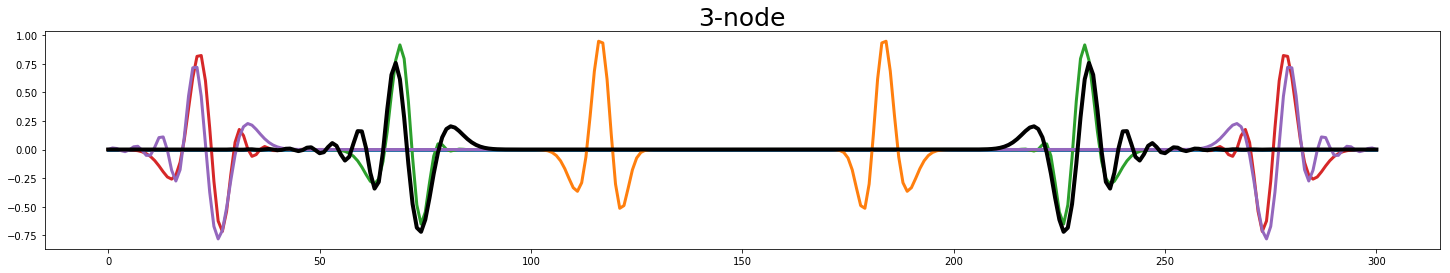

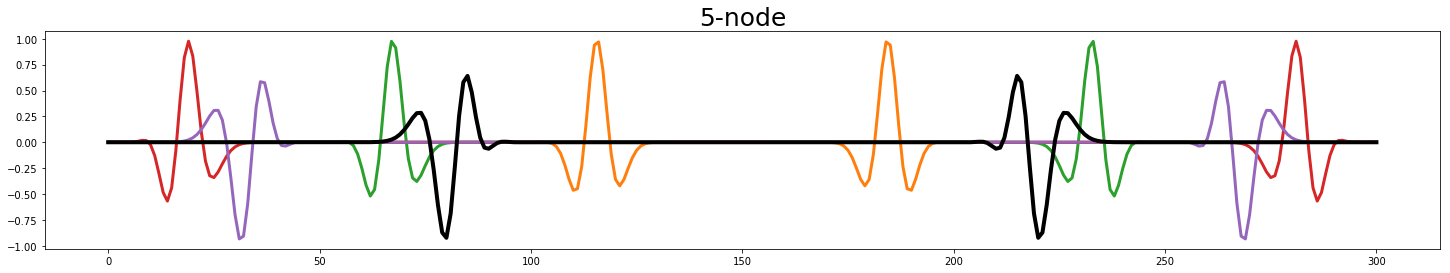

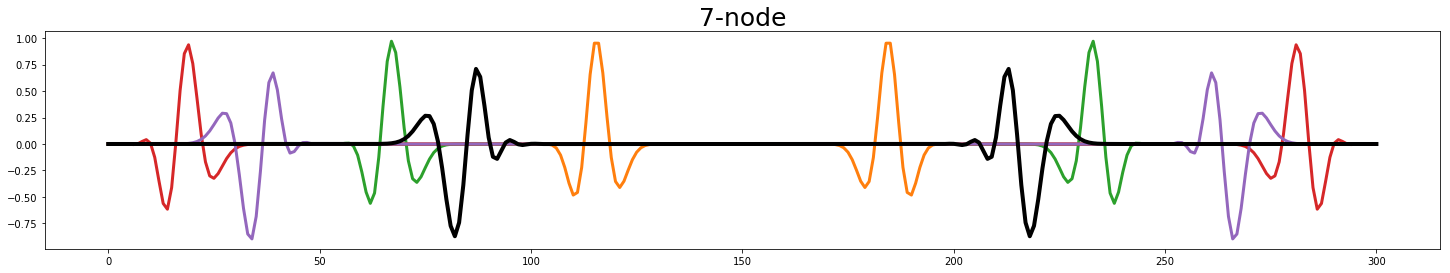

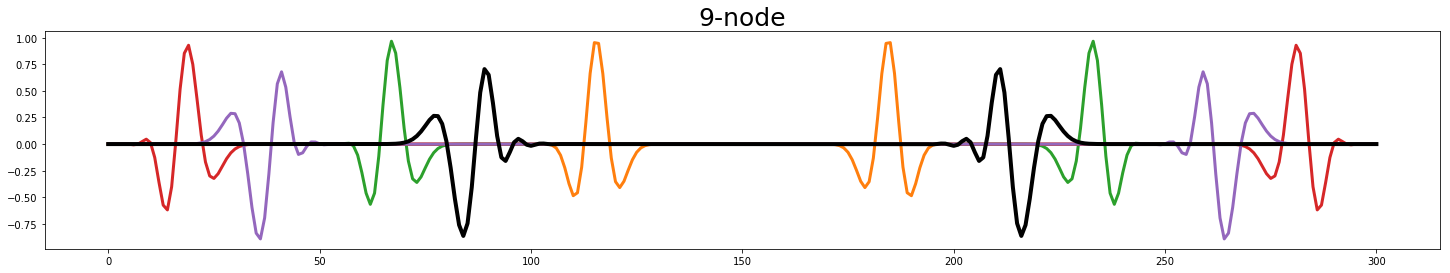

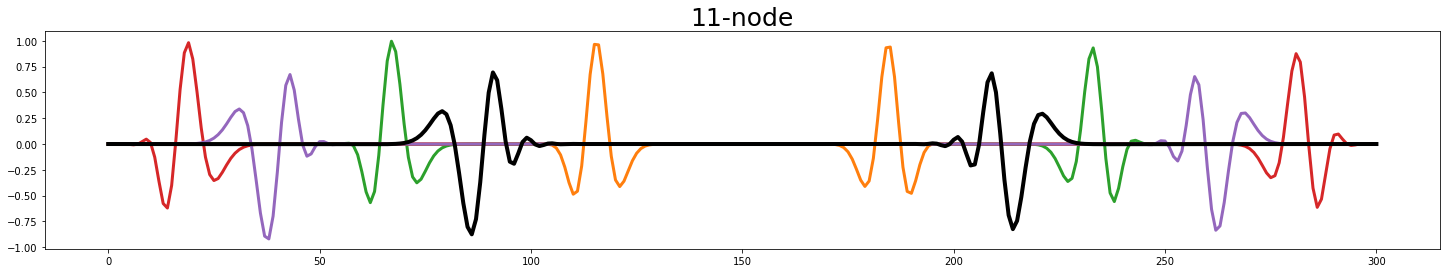

In [3]:
nt = 401
dt = 1e-3
nx = 301
dx = 1
c = 600.
f = 45
sx = nx // 2
aco_1D_3node(nt, dt, f, c, nx, dx, sx, '3-node')
aco_1D_5node(nt, dt, f, c, nx, dx, sx, '5-node')
aco_1D_7node(nt, dt, f, c, nx, dx, sx, '7-node')
aco_1D_9node(nt, dt, f, c, nx, dx, sx, '9-node')
aco_1D_11node(nt, dt, f, c, nx, dx, sx, '11-node')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_1D_shape(x, u, method):
    tn = 5
    nt = len(u[:, 0])
    nn = nt // tn
    plt.figure(figsize=(25, 4))
    for i in range(tn+1):
        d = u[i*nn]
        if i < tn:
            plt.plot(x, d, lw=3)
        else:
            plt.plot(x, d, color='k', lw=4)
    plt.title(method, fontsize=25)
    plt.show()

def aco_1D_3node(nt, dt, f, c, nx, dx, sx, method):
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    u = np.zeros((nt, nx))
    s = (1-2*(np.pi*f*(t-1/f))**2) * np.exp(-(np.pi*f*(t-1/f))**2)
    A = (c*dt/dx)**2
    for i in range(1, nt-1):
        for j in range(1, nx-1):
            if j == sx:
                u[i+1, j] = s[i]
            else:
                u[i+1, j] = 2*u[i, j] - u[i-1, j] + A*(u[i, j+1]-2*u[i, j]+u[i, j-1])
    plot_1D_shape(x, u, method)